In [1]:
import numpy
%matplotlib nbagg
from matplotlib import pyplot
from tqdm import tqdm, tnrange
from astropy.io import fits

import aotools
from aotools.turbulence import infinitephasescreen, phasescreen


In [5]:
n_zerns = 60
nx_size = 128
D = 4.2
pxl_scale = D/nx_size
r0 = 0.164
L0 = 100
wind_speed = 10 #m/s - just arbitrarily set
n_tests = 16
n_scrns = 10000
noll = fits.getdata("resources/noll.fits").diagonal() * (D/r0)**(5./3)
stencil_length_factor = 32

In [6]:
# Create arrary of zernikes
print("Make Zernikes...")
Zs = aotools.zernikeArray(n_zerns, nx_size)

Make Zernikes...


# Test Infinite (Assemat) Phase Screen

In [7]:
nCol = 2
time_step = pxl_scale/wind_speed # This is timestep, as one pixel added on each iteration

print("Run tests")
z_coeffs_inf = numpy.zeros((n_tests, n_scrns, n_zerns))
# fig = pyplot.figure()

for n in tnrange(n_tests):
    print("Init phase screen")
    phase_screen = infinitephasescreen.PhaseScreenVonKarman(nx_size, pxl_scale, r0, L0, n_columns=nCol)
    for i in tnrange(n_scrns):
        
        # Go in all directions
        phase_screen.add_row()
        if n%4 == 0:
            scrn = phase_screen.scrn
        elif n%4 == 1:
            scrn = phase_screen.scrn.T
        elif n%4 == 2:
            scrn = phase_screen.scrn[::-1]
        else:
            scrn = phase_screen.scrn[::-1].T
            
        z_coeffs_inf[n, i] = (scrn * Zs).sum((-1, -2))/(Zs[0].sum())
    
#         pyplot.cla()
#         pyplot.imshow(scrn)
#         fig.canvas.draw()
    
z_vars_inf = z_coeffs_inf.var(1)

Run tests


Init phase screen


Init phase screen


Init phase screen


Init phase screen


Init phase screen


Init phase screen


Init phase screen


Init phase screen


Init phase screen


Init phase screen


Init phase screen


Init phase screen


Init phase screen


Init phase screen


Init phase screen


Init phase screen


<IPython.core.display.Javascript object>


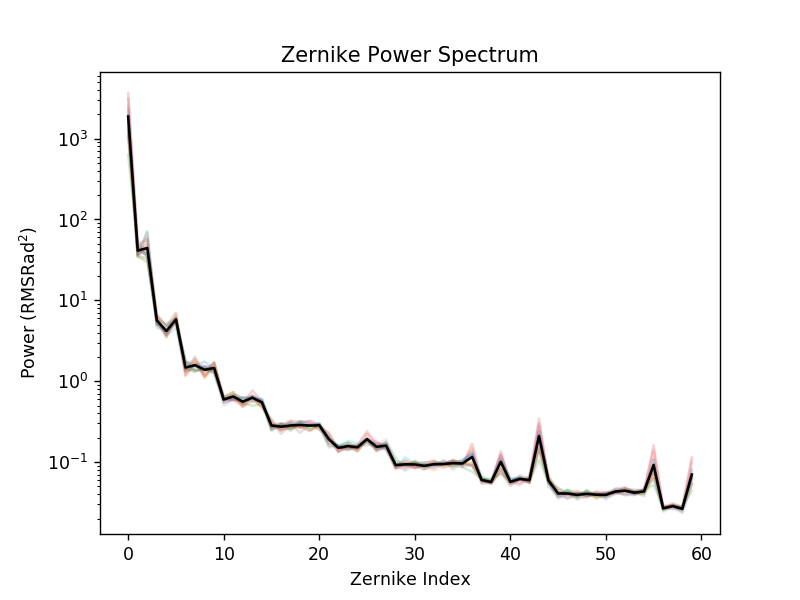

In [8]:
pyplot.figure()
pyplot.semilogy(z_vars_inf.T, alpha=0.2)
pyplot.semilogy(z_vars_inf.mean(0), color="k")
pyplot.title("Zernike Power Spectrum")
pyplot.xlabel("Zernike Index")
pyplot.ylabel("Power ($\mathrm{RMS Rad}^2$)")

# Zernike breakdown of standard FFT screen

In [9]:
total_scrn_size = stencil_length_factor * nx_size
print("Total Screen Size: {}".format(total_scrn_size))

time_step = pxl_scale/wind_speed # This is timestep, as one pixel added on each iteration
print("Time step: {}s".format(time_step))

n_scrns = total_scrn_size - nx_size

z_coeffs_fft = numpy.zeros((n_tests, n_scrns, n_zerns))
z_vars_fft = numpy.zeros((n_tests, n_zerns))
for n in tnrange(n_tests):
    print("Make large phase screen...")
    phase_screen = phasescreen.ft_phase_screen(r0, total_scrn_size, pxl_scale, L0, 0.01)[:, :nx_size]

    print("Get Zernike Coeffs")
#     fig = pyplot.figure()
    for i in tnrange(n_scrns):
        scrn = phase_screen[i:i+nx_size]
        
        if n%4 == 0:
            scrn = scrn
        elif n%4 == 1:
            scrn = scrn.T
        elif n%4 == 2:
            scrn = scrn[::-1]
        else:
            scrn = scrn[::-1].T
        
#         pyplot.cla()
#         pyplot.imshow(scrn)
#         fig.canvas.draw()
        z_coeffs_fft[n, i] = (scrn * Zs).sum((-1, -2))/(Zs[0].sum())

    z_vars_fft[n] = z_coeffs_fft[n].var(0)

Total Screen Size: 4096
Time step: 0.0032812500000000003s


Make large phase screen...
Get Zernike Coeffs


Make large phase screen...
Get Zernike Coeffs


Make large phase screen...
Get Zernike Coeffs


Make large phase screen...
Get Zernike Coeffs


Make large phase screen...
Get Zernike Coeffs


Make large phase screen...
Get Zernike Coeffs


Make large phase screen...
Get Zernike Coeffs


Make large phase screen...
Get Zernike Coeffs


Make large phase screen...
Get Zernike Coeffs


Make large phase screen...
Get Zernike Coeffs


Make large phase screen...
Get Zernike Coeffs


Make large phase screen...
Get Zernike Coeffs


Make large phase screen...
Get Zernike Coeffs


Make large phase screen...
Get Zernike Coeffs


Make large phase screen...
Get Zernike Coeffs


Make large phase screen...
Get Zernike Coeffs


<IPython.core.display.Javascript object>


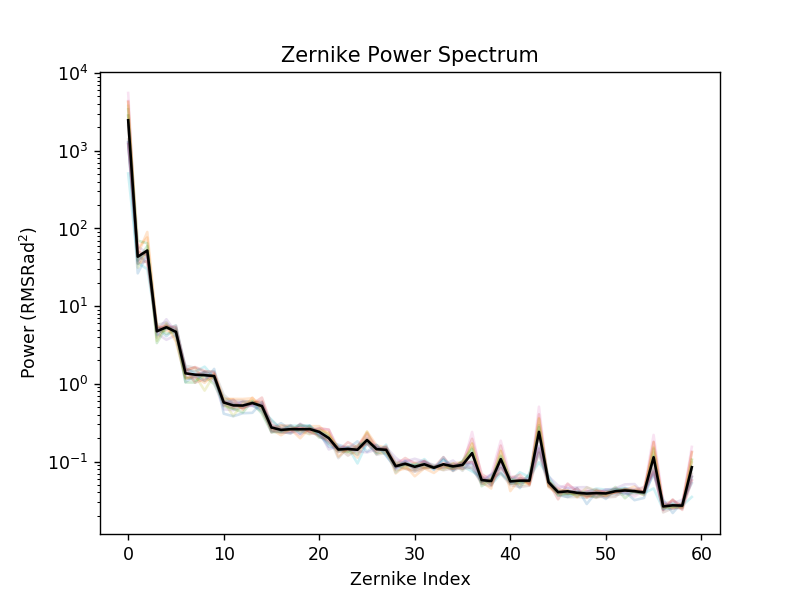

In [10]:
pyplot.figure()
pyplot.semilogy(z_vars_fft.T, alpha=0.2)
pyplot.semilogy(z_vars_fft.mean(0), color="k")
pyplot.title("Zernike Power Spectrum")
pyplot.xlabel("Zernike Index")
pyplot.ylabel("Power ($\mathrm{RMS Rad}^2$)")

<IPython.core.display.Javascript object>


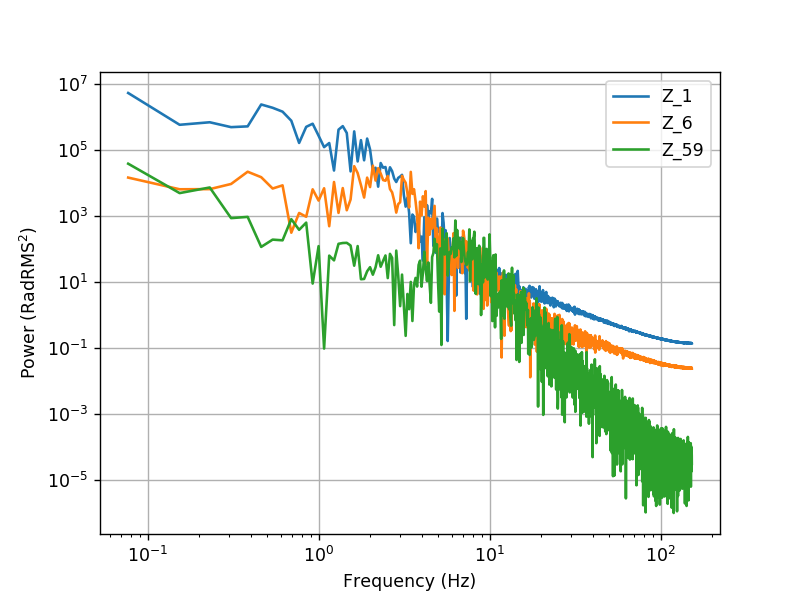

plot Z1
plot Z6
plot Z59


In [11]:
pyplot.figure()
plot_zs = [1, 6,59]
for i, z in enumerate(plot_zs):
    print("plot Z{}".format(z))
    zn_coeffs = z_coeffs_fft.mean(0)[:, z]
    z_ps = abs(numpy.fft.fft(zn_coeffs))**2
    x_vals = numpy.fft.fftfreq(len(z_ps), d=time_step)
    pyplot.loglog(x_vals[:n_scrns//2], z_ps[:n_scrns//2], label="Z_{}".format(z))
    pyplot.xlabel("Frequency (Hz)")
    pyplot.ylabel("Power ($\mathrm{Rad RMS}^2$)")
    pyplot.grid()
pyplot.legend()

<IPython.core.display.Javascript object>


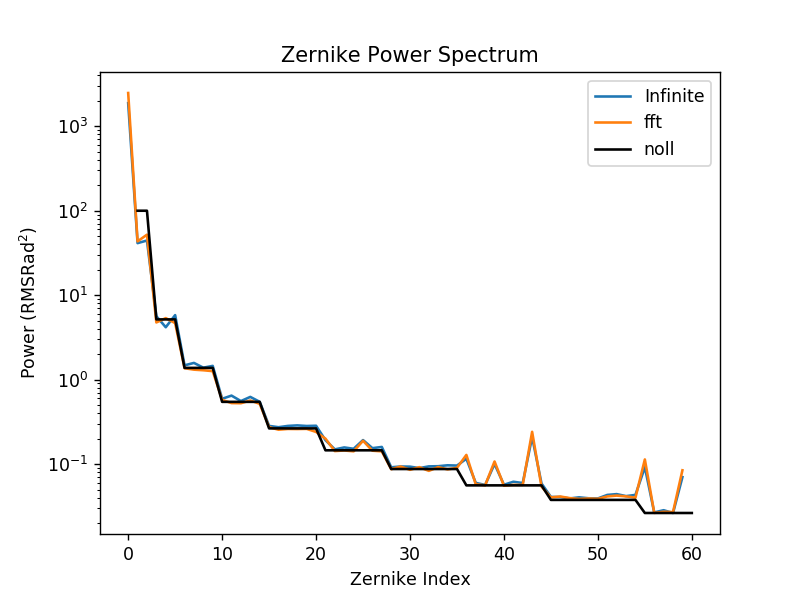

In [12]:
pyplot.figure()
pyplot.semilogy(z_vars_inf.mean(0), label="Infinite")
pyplot.semilogy(z_vars_fft.mean(0), label="fft")
pyplot.semilogy(range(1, n_zerns+1), noll[:n_zerns] , label="noll", color="k") 
pyplot.title("Zernike Power Spectrum")
pyplot.xlabel("Zernike Index")
pyplot.ylabel("Power ($\mathrm{RMS Rad}^2$)")
pyplot.legend()

# Run tests with higher sampling

In [ ]:
n_zerns = 60
nx_size = 128
D = 4.2
pxl_scale = D/nx_size
r0 = 0.164
L0 = 100
wind_speed = 10 #m/s - just arbitrarily set
n_tests = 16
n_scrns = 10000
noll = fits.getdata("resources/noll.fits").diagonal() * (D/r0)**(5./3)
stencil_length_factor = 32